# Business Understanding/Overview


I am charged with determining which aircrafts have the lowest risk for the company to start a new business since it is trying to expand and diversify  its portfolio. They are interested in purchasing and operating airplanes for both commercial and private enterprises, but do not know anything about the potential risks of aircraft. My aim is to assist look at the data, analyse  then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase

# Problem Statement

The company wants to get into  new industries and explore aircrafts for commercial and private purposes and it requires assessment form the data to identify low-risk aircraft. The goal is to recommend low risk aircraft that are suitable for successful market entry. Actionable insights will guide the aviation division in making informed purchasing decisions.


# Objective



1. Identify and compare accident rates versus aircraft model to find the ones with the lowest accident rate and the safest

2. Look at geographical distribution of accidents to identify regions or routes with higher risk which will help in planning and strategic deployment of the aircraft.

3. Analyze past data to identify accident trends over time and determine whether accident rates are improving or worsening.

4. : Compare commercial and private aircraft to understand which would be more profitable and practical for the company to adopt




# Success Criteria



1. The project will be successful if we are able to identify how viable it is to get into the aircraft business through the analysis made

2. If we are  able to deliver clear and analysed accident rates created by specific aircrafts to identify the one with the lowest risk

3. Deliver actionable comparisons between commercial and private aircraft and proof of why either is more profitable



# Limitations and Assumptions




*   Due to missing and incomplete data, we may not get the true picture of the recommendations that would be made
*   We only have Accidents data and that may not be conclusive in datermining whether an aircraft is viable, durable and cost efficient. Safety of the aircraft alone might not be sufficient





# Data Understanding

In [4]:
#Imporrt Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Reading the dataset from a csv file using pandas 
#I encountered an error and researched on how to fix it with the below code

df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)


# Aviation Data 

The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

In [6]:

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [7]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [8]:
#Checking for shape of the dataset
df.shape

(88889, 31)

In [9]:
df['Investigation.Type']

0        Accident
1        Accident
2        Accident
3        Accident
4        Accident
           ...   
88884    Accident
88885    Accident
88886    Accident
88887    Accident
88888    Accident
Name: Investigation.Type, Length: 88889, dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

1. There are 31 columns, including categorical and numerical data, with several columns containing missing values.
2. Most columns are of type object. Columns such as Event.Date, Publication.Date, and Latitude/Longitude may require:
Conversion to appropriate types ie, datetime for date columns, float for geospatial coordinates.

In [11]:
#Checking for any duplicates
df.duplicated().sum()

0

In [12]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [13]:
#Checking for null values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [14]:
# Calculating the missing values
missing_summary = df.isna().sum().sort_values(ascending=False)
missing_percentage = (df.isna().mean() * 100).sort_values(ascending=False)

# Creating and displaying summary DataFrame
missing_data = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing %': missing_percentage.round(2)
})

# Displaying the columns with the missing values
missing_data = missing_data[missing_data['Missing Count'] > 0]

missing_data

,Missing Count,Missing %
Schedule,76307,85.85
Air.carrier,72241,81.27
FAR.Description,56866,63.97
Aircraft.Category,56602,63.68
Longitude,54516,61.33
Latitude,54507,61.32
Airport.Code,38640,43.47
Airport.Name,36099,40.61
Broad.phase.of.flight,27165,30.56
Publication.Date,13771,15.49


# Handling the missing value

# Data Cleaning

The following columns were dropped due to the high percentage of missing values:

- **Schedule (85.85% missing)**:  

- **Air.carrier (81.27% missing)**:  
 
- **FAR.Description (63.97% missing)**:  
  
- **Aircraft.Category (63.68% missing)**:  

- **Longitude and Latitude (61.33% and 61.28% missing, respectively)**:

In [15]:
columns_to_drop = ["Schedule", "Air.carrier", "FAR.Description", "Aircraft.Category", "Longitude", "Latitude"]

# Dropping the columns
df = df.drop(columns=columns_to_drop)

# Verifying the columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Airport.Code            50249 non-null  object 
 7   Airport.Name            52790 non-null  object 
 8   Injury.Severity         87889 non-null  object 
 9   Aircraft.damage         85695 non-null  object 
 10  Registration.Number     87572 non-null  object 
 11  Make                    88826 non-null  object 
 12  Model                   88797 non-null  object 
 13  Amateur.Built           88787 non-null  object 
 14  Number.of.Engines       82805 non-null

### Columns with missing values that can be inputed

Location (0.06%)

In [16]:
# Checking rows where Location is missing
missing_location_rows = df[df['Location'].isna()]

# Filling missing Location values with Airport.Name
df['Location'] = df['Location'].fillna(df['Airport.Name'])

In [17]:
remaining_missing_location = df['Location'].isna().sum()
remaining_missing_location
remaining_missing_location = df['Location'].isna().sum()
remaining_missing_location

50

I decided to drop the remaining 50 missing location entries because imputing them using the mode could introduce inaccuracies. Also, 50 represents only a small percentage of the dataset.

In [18]:
# Dropping rows where Location is missing
df = df.dropna(subset=['Location'])

In [19]:
# Verifying if all missing values in 'Location' are handled
remaining_missing_location = df['Location'].isna().sum()
remaining_missing_location

0

 Country (0.25% missing)

In [20]:
# Drop rows with missing values in the 'Country' column
dropped_missing_country = df.dropna(subset=['Country'])

# Verify if missing values were removed
remaining_missing_country = dropped_missing_country['Country'].isna().sum()
remaining_missing_country


0

The percentage of the missing rows in the data is insignificant and replacing it might affect the accuracy of the data

Injury.Severity (1.13% missing)

In [21]:
# Grouping by related columns like 'Aircraft.damage' and 'Broad.phase.of.flight'
# and imputing missing 'Injury.Severity' based on the most frequent value in each group

grouped_injury_severity = df.groupby(['Aircraft.damage', 'Broad.phase.of.flight'])['Injury.Severity'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
grouped_injury_severity

# Apply imputation to missing 'Injury.Severity'
for group, mode_value in grouped_injury_severity.items():
    mask = (df['Aircraft.damage'] == group[0]) & (df['Broad.phase.of.flight'] == group[1])
    df.loc[mask & df['Injury.Severity'].isna(), 'Injury.Severity'] = mode_value

# If there are still missing values, impute using the mode of the 'Injury.Severity' column
df['Injury.Severity'] = df['Injury.Severity'].fillna(df['Injury.Severity'].mode()[0])

In [22]:
remaining_missing_injury_severity = df['Injury.Severity'].isna().sum()

remaining_missing_injury_severity

0

Aircraft.damage (3.59% missing)

In [23]:
# Impute missing values in 'Aircraft.damage' based on 'Injury.Severity'
# Group by 'Injury.Severity' and calculate the mode of 'Aircraft.damage' for each group
grouped_aircraft_damage = df.groupby('Injury.Severity')['Aircraft.damage'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

# Apply imputation to missing 'Aircraft.damage'
for injury_severity, mode_value in grouped_aircraft_damage.items():
    mask = df['Injury.Severity'] == injury_severity
    df.loc[mask & df['Aircraft.damage'].isna(), 'Aircraft.damage'] = mode_value

# If there are still missing values, impute using the mode of 'Aircraft.damage' column
df['Aircraft.damage'] = df['Aircraft.damage'].fillna(df['Aircraft.damage'].mode()[0])

# Verify if all missing values in 'Aircraft.damage' are handled
remaining_missing_aircraft_damage = df['Aircraft.damage'].isna().sum()

remaining_missing_aircraft_damage

0

Dropping the two  columns since I will not use them in the analysis

In [24]:
columns_to_drop = ['Number.of.Engines', 'Engine.Type']

# Dropping the columns
df = df.drop(columns=columns_to_drop)

# Verifying the columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88839 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88839 non-null  object 
 1   Investigation.Type      88839 non-null  object 
 2   Accident.Number         88839 non-null  object 
 3   Event.Date              88839 non-null  object 
 4   Location                88839 non-null  object 
 5   Country                 88614 non-null  object 
 6   Airport.Code            50249 non-null  object 
 7   Airport.Name            52790 non-null  object 
 8   Injury.Severity         88839 non-null  object 
 9   Aircraft.damage         88839 non-null  object 
 10  Registration.Number     87544 non-null  object 
 11  Make                    88776 non-null  object 
 12  Model                   88747 non-null  object 
 13  Amateur.Built           88741 non-null  object 
 14  Purpose.of.flight       82655 non-null

 Purpose.of.flight (7.11% missing)

In [25]:
# Drop rows with missing values in the 'Purpose.of.flight' column
Purpose_of_flight_cleaned = df.dropna(subset=['Purpose.of.flight'])

# Verify if any missing values remain in 'Purpose.of.flight'
remaining_missing_purpose_of_flight = Purpose_of_flight_cleaned['Purpose.of.flight'].isna().sum()

remaining_missing_purpose_of_flight


0

Weather.Condition (5.06% missing)

In [34]:
# Drop rows with missing values in the 'Weather.Condition' column
aviation_data_cleaned = df.dropna(subset=['Weather.Condition'])

# Verify if any missing values remain in 'Weather.Condition'
remaining_missing_weather_condition = aviation_data_cleaned['Weather.Condition'].isna().sum()

remaining_missing_weather_condition


0

## Data Preparation


In [35]:
#Take a look at the columns
print(df.columns)


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Purpose.of.flight', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


Identify and compare accident rates versus aircraft model to find the ones with the lowest accident rate and the safest

In [36]:
#Retrieving the different aircraft models available
df['Model']

0            108-3
1         PA24-180
2             172M
3              112
4              501
           ...    
88884    PA-28-151
88885         7ECA
88886        8GCBC
88887         210N
88888    PA-24-260
Name: Model, Length: 88839, dtype: object

In [29]:
#Retrieving the unique values from the 'Model'
df['Model'].unique()

array(['108-3', 'PA24-180', '172M', ..., 'ROTORWAY EXEC 162-F',
       'KITFOX S5', 'M-8 EAGLE'], dtype=object)

In [37]:
#Getting to know the count of unique values there are each model 
df['Model'].value_counts()

152                    2365
172                    1755
172N                   1164
PA-28-140               932
150                     829
                       ... 
BE-80                     1
M4-220                    1
AVID AIRCRAFT FLYER       1
Classic Sport S-18        1
ACAPELLA                  1
Name: Model, Length: 12309, dtype: int64

In [38]:
# Get the top 10  most common models
top_models = df['Model'].value_counts().head(10)
top_models

152          2365
172          1755
172N         1164
PA-28-140     932
150           829
172M          798
172P          689
182           659
180           622
150M          585
Name: Model, dtype: int64

Safety Analysis: Focus on analyzing the safety records of the most common models.

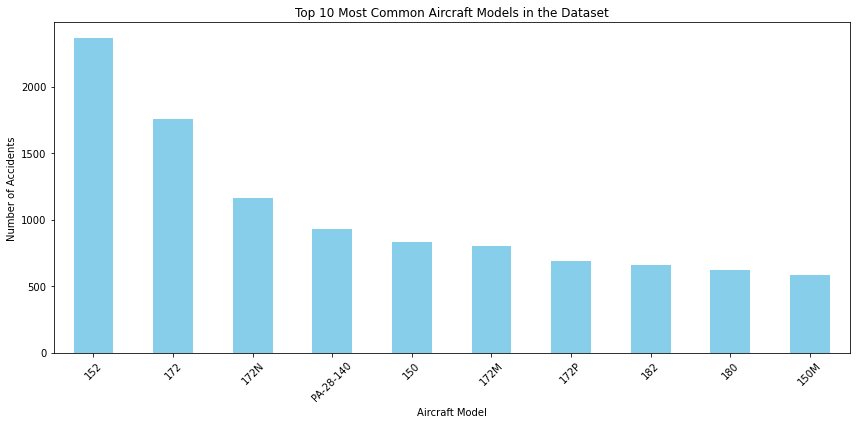

In [39]:

# Create a bar chart
plt.figure(figsize=(12, 6))
top_models.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Aircraft Models in the Dataset')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
